In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19116\3274969418.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


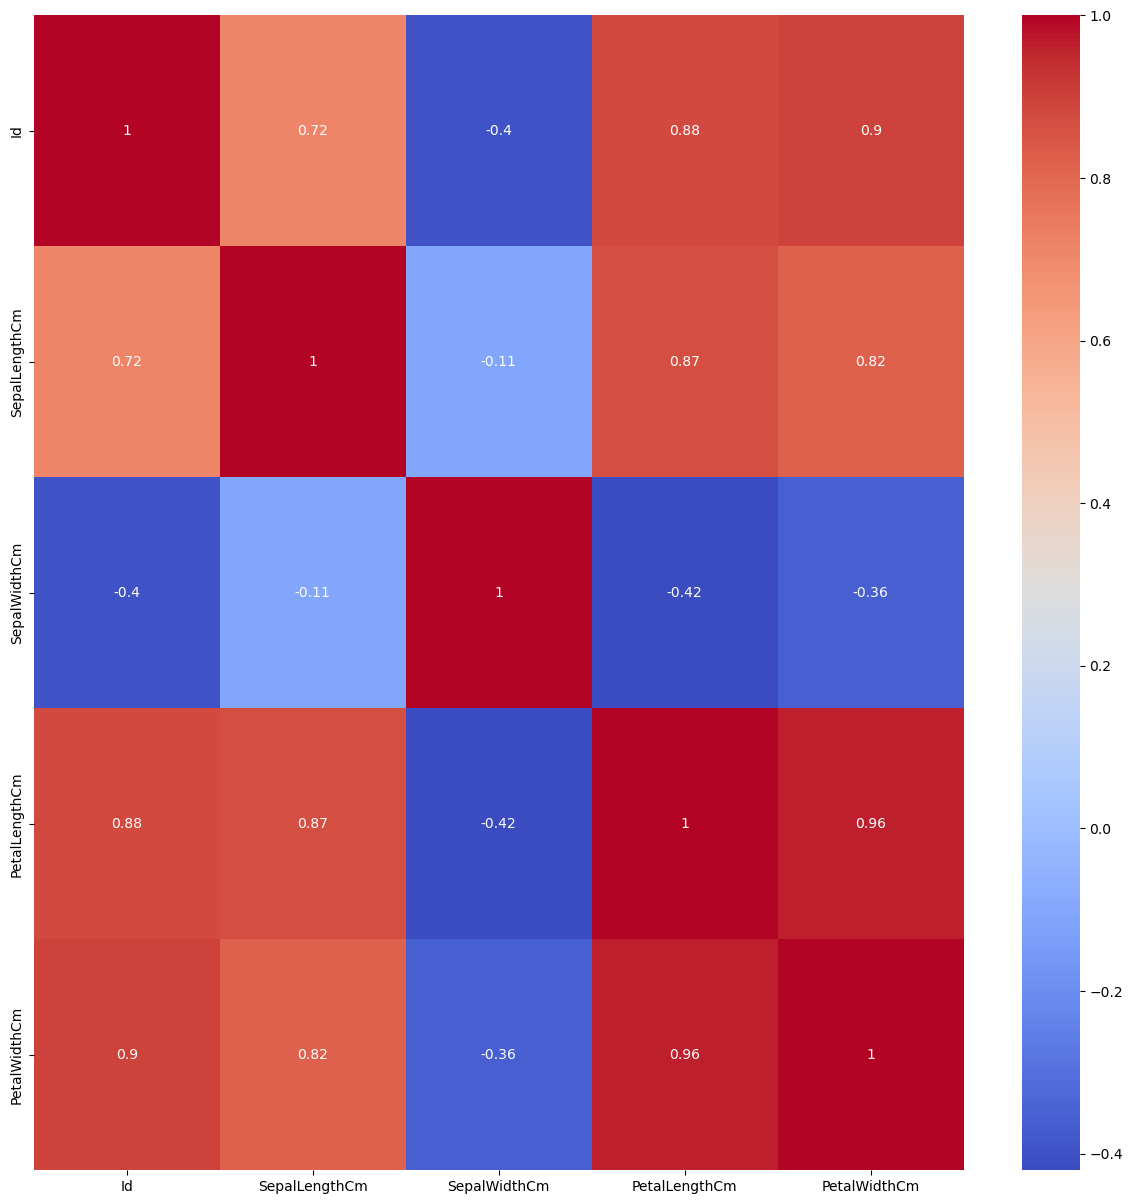

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [7]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

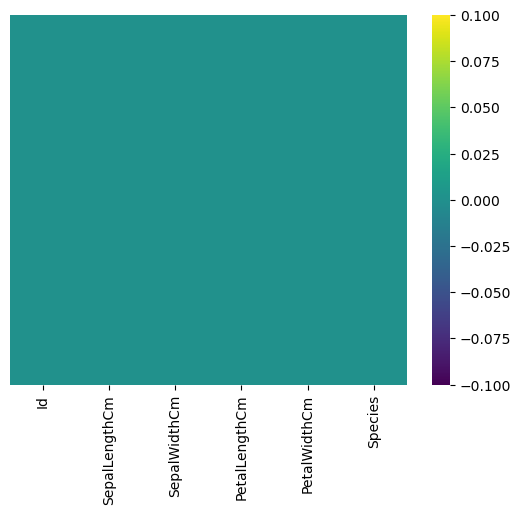

In [8]:
sns.heatmap(df.isnull(),yticklabels = False,cbar=True, cmap='viridis')

In [9]:
df.shape #non attribute function

(150, 6)

In [10]:
df=df.drop(['Id'],axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


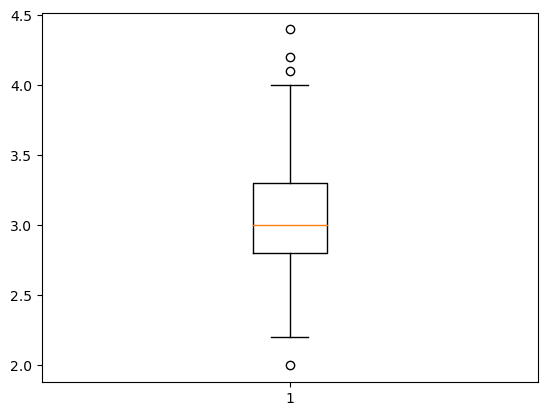

In [11]:
plt.boxplot(df['SepalWidthCm']); # here we can see we have outliers,only sepalwidth have outliers

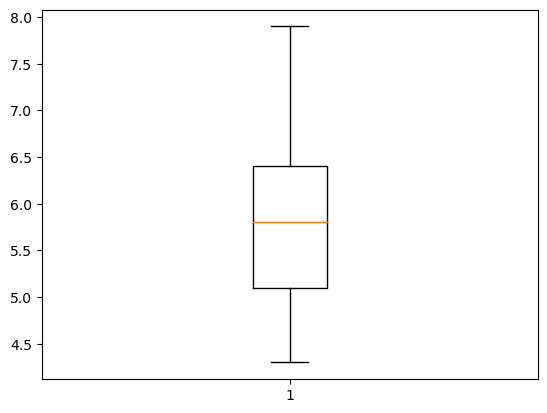

In [12]:
plt.boxplot(df['SepalLengthCm']);

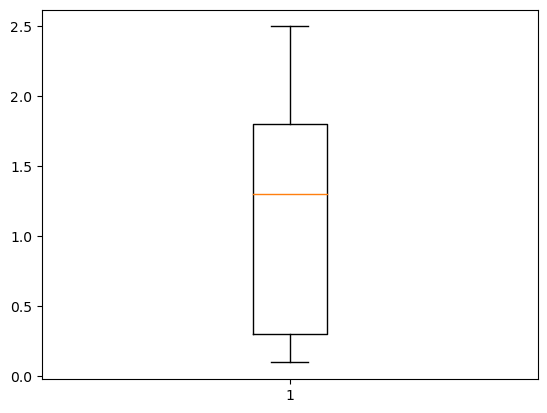

In [13]:
plt.boxplot(df['PetalWidthCm']);

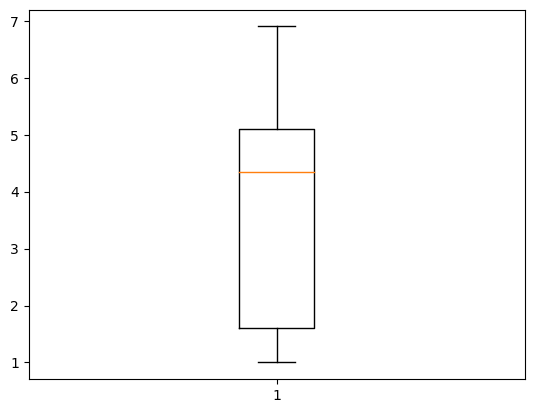

In [14]:
plt.boxplot(df['PetalLengthCm']); #or sns.boxplot(df['PetalLength'])

In [15]:
df['zscore'] = (df.SepalWidthCm - df.SepalWidthCm.mean())/df.SepalWidthCm.std()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


# Plotting histogram 

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

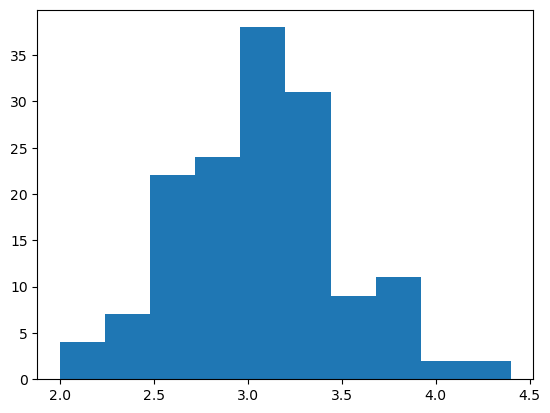

In [16]:
plt.hist(df['SepalWidthCm'])

Histogram comes out in the shape of Bell Curve.

# Removing outliers

In [17]:
print("The outliers are:")
df[(df.zscore <-2) | (df.zscore>2)]  #for removing outliers(data between -2 and 2)

The outliers are:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
14,5.8,4.0,1.2,0.2,Iris-setosa,2.181763
15,5.7,4.4,1.5,0.4,Iris-setosa,3.104284
32,5.2,4.1,1.5,0.1,Iris-setosa,2.412393
33,5.5,4.2,1.4,0.2,Iris-setosa,2.643024
60,5.0,2.0,3.5,1.0,Iris-versicolor,-2.430844


In [18]:
df1 = df[(df.zscore > -2) & (df.zscore < 2)] #the datas which are not outliers.
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,-0.124540
146,6.3,2.5,5.0,1.9,Iris-virginica,-1.277692
147,6.5,3.0,5.2,2.0,Iris-virginica,-0.124540
148,6.2,3.4,5.4,2.3,Iris-virginica,0.797981


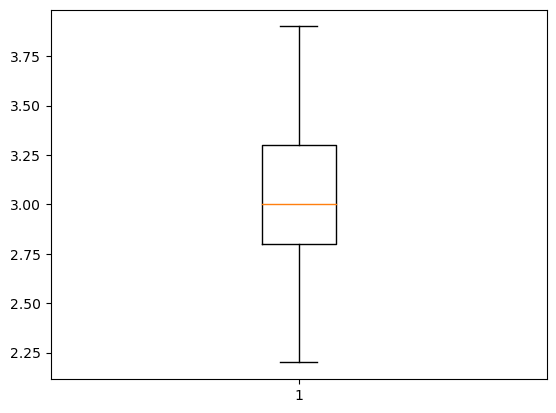

In [19]:
plt.boxplot(df1['SepalWidthCm']); #since we have removed the outliers,we are now getting a graph without outliers.

In [20]:
df1.groupby('Species').size() #multi class classification of Species(target variable)

Species
Iris-setosa        46
Iris-versicolor    49
Iris-virginica     50
dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19116\1608984703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),yticklabels = True,cbar = True, cmap = 'viridis',annot = True)


<Axes: >

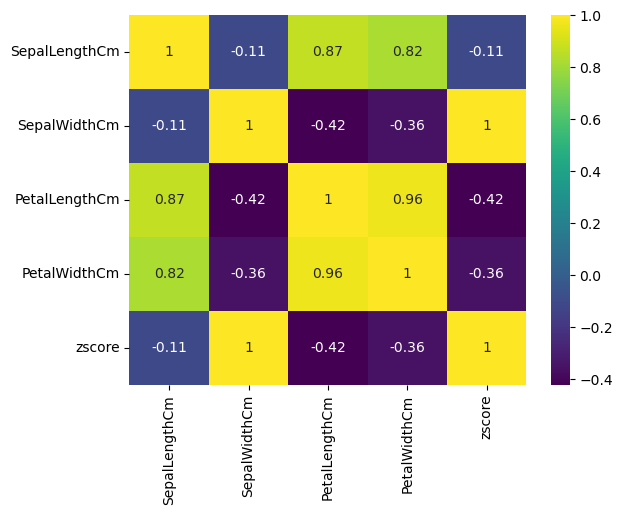

In [21]:
sns.heatmap(df.corr(),yticklabels = True,cbar = True, cmap = 'viridis',annot = True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Species'] = le.fit_transform(df1['Species']) # since machine learning don't undertand string so species being a object type need to be encoded
df1

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19116\3602899919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Species'] = le.fit_transform(df1['Species']) # since machine learning don't undertand string so species being a object type need to be encoded


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,0,1.028611
1,4.9,3.0,1.4,0.2,0,-0.124540
2,4.7,3.2,1.3,0.2,0,0.336720
3,4.6,3.1,1.5,0.2,0,0.106090
4,5.0,3.6,1.4,0.2,0,1.259242
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,-0.124540
146,6.3,2.5,5.0,1.9,2,-1.277692
147,6.5,3.0,5.2,2.0,2,-0.124540
148,6.2,3.4,5.4,2.3,2,0.797981


<Axes: >

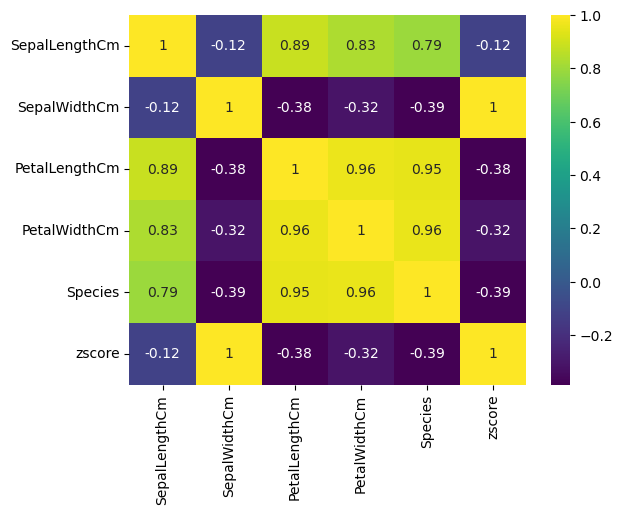

In [23]:
sns.heatmap(df1.corr(),yticklabels = True,cbar = True, cmap = 'viridis',annot = True)

In [24]:
feature_columns = ['SepalLengthCm','PetalLengthCm','PetalWidthCm']
x = df1[feature_columns].values
y = df1['Species'].values
x

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3, 0.3],
       [4.4, 1.3, 0.2],
       [5. , 1.6, 0.6],
       [5.1, 1.9, 0.4],
       [4.8, 1.4

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
#creating a classifier
knn = KNeighborsClassifier(n_neighbors = 5) #k=5
#fit the classfier in the dataset
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
knn.predict(x_test) [0:5]

array([0, 1, 0, 2, 1])

In [29]:
knn.score(x_test,y_test)

1.0

# Heading the parameters using GridSearchCV

In [30]:
#Finding the best value of k 
from sklearn.model_selection import GridSearchCV

#creating a new KNN model
knn2 = KNeighborsClassifier()

# creating a dictionary to  store the value of k
param_grid = {"n_neighbors": np.arange(1,30)} #param_grid-name of a dictionary.........cv-cross validation

knn_gscv = GridSearchCV(knn2, param_grid,cv=5)
#fit the model
knn_gscv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [31]:
knn_gscv.best_params_

{'n_neighbors': 3}

In [32]:
knn_gscv.best_score_

0.9724137931034484